In [1]:
import datetime
import warnings

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn           as sns
from pandas.plotting import scatter_matrix

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute          import SimpleImputer
from sklearn.compose         import ColumnTransformer
from sklearn.preprocessing   import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler

from sklearn.cluster      import KMeans, DBSCAN
from sklearn.linear_model import LinearRegression


from IPython.display import display

import pandas as pd
import numpy  as np

from scipy.stats                   import ttest_ind
from statsmodels.graphics.gofplots import qqplot

#

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [13, 7]
np.random.seed(1642)

In [2]:
c=['Ângulo Frontal de inclinação pélvica em contato com a bola',
 'Ângulo Frontal de inclinação pélvica no apoio intermediário',
 'Ângulo frontal de joelho em apoio intermediário',
 'Ângulo frontal de joelho em contato com a bola',
 'Ângulo frontal de quadril em apoio intermediário',
 'Ângulo frontal de quadril em contato com a bola',
 'Ângulo sagital de joelho em apoio intermediário',
 'Ângulo sagital de joelho em contato com a bola',
 'Ângulo sagital de quadril em apoio intermediário',
 'Ângulo sagital de quadril em contato com a bola',
 'Ângulo sagital de tornozelo em apoio intermediário',
 'Ângulo sagital de tornozelo em contato com a bola']

# Avaliação

In [3]:
sheet = "Avaliação"

In [4]:
df = pd.read_excel('Dados IC Futebol Final.xlsx', encoding='latin-1', sheet_name=sheet).iloc[:114]

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo Frontal de inclinação pélvica em contato com a bola


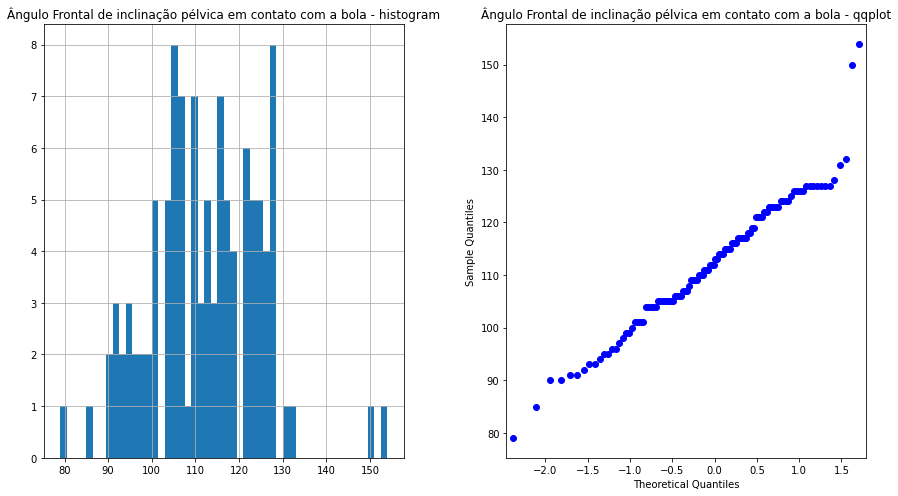

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo Frontal de inclinação pélvica no apoio intermediário


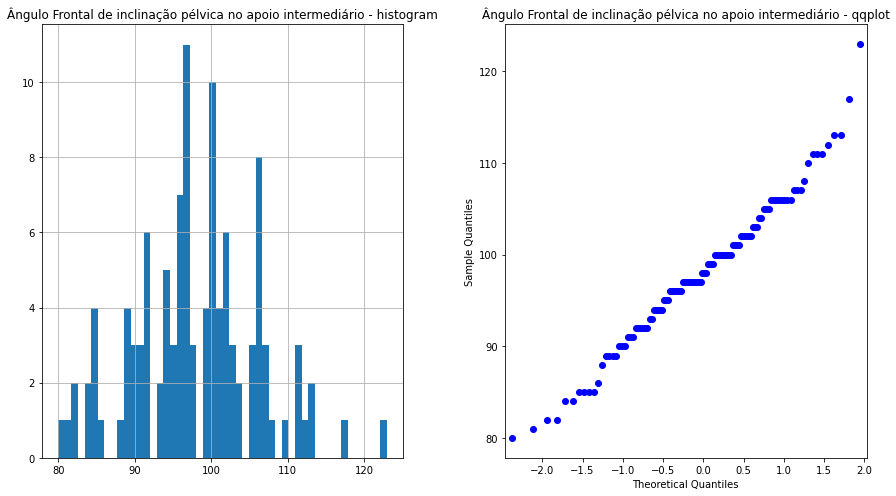

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo frontal de joelho em apoio intermediário


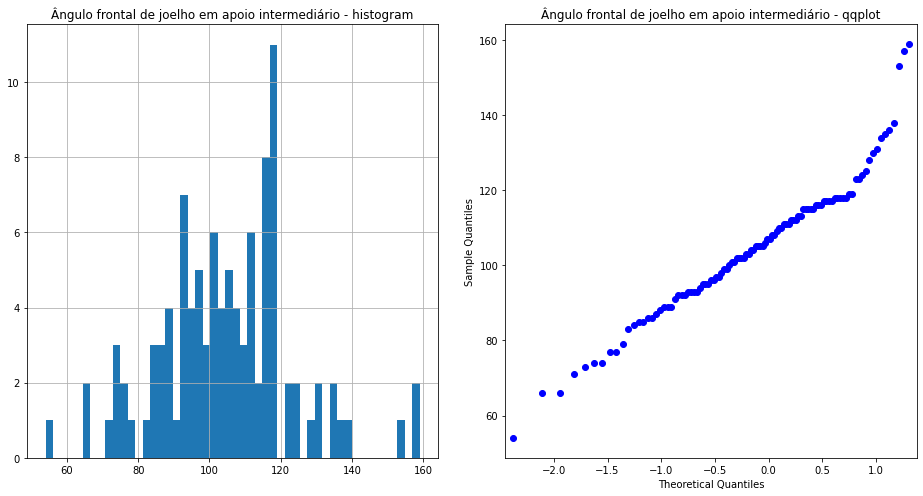

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo frontal de joelho em contato com a bola


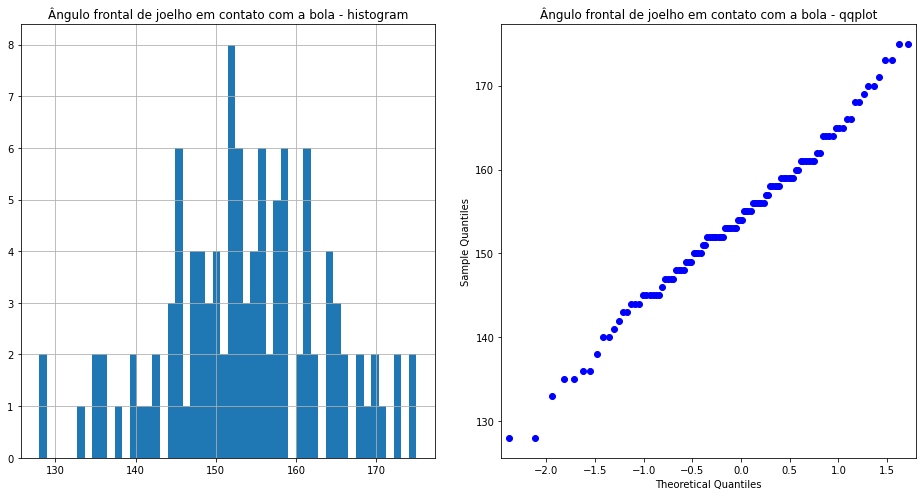

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo frontal de quadril em apoio intermediário


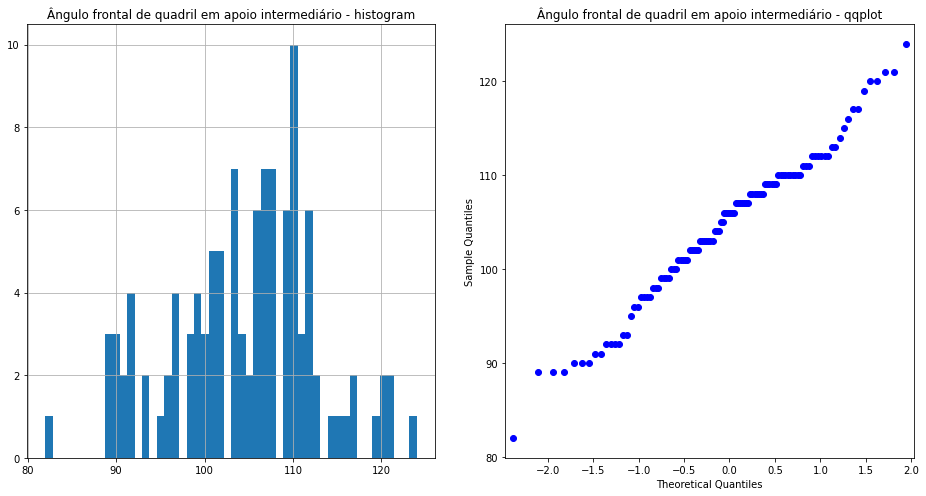

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo frontal de quadril em contato com a bola


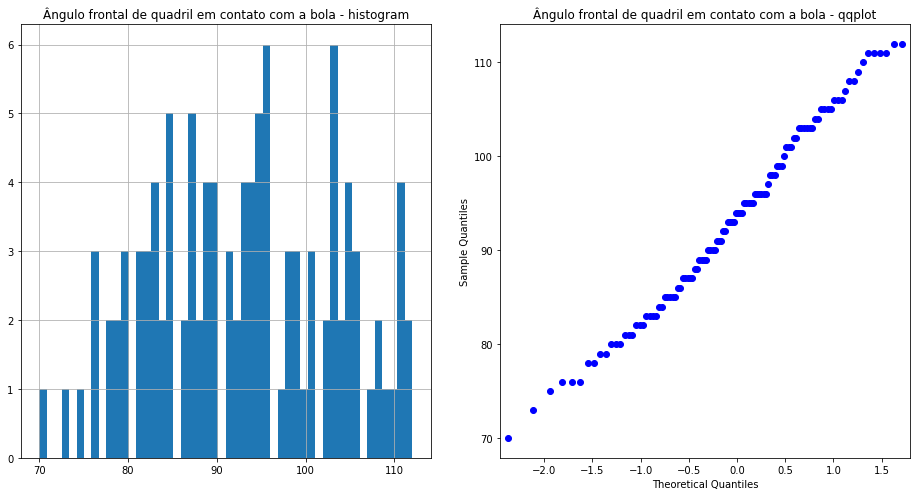

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo sagital de joelho em apoio intermediário


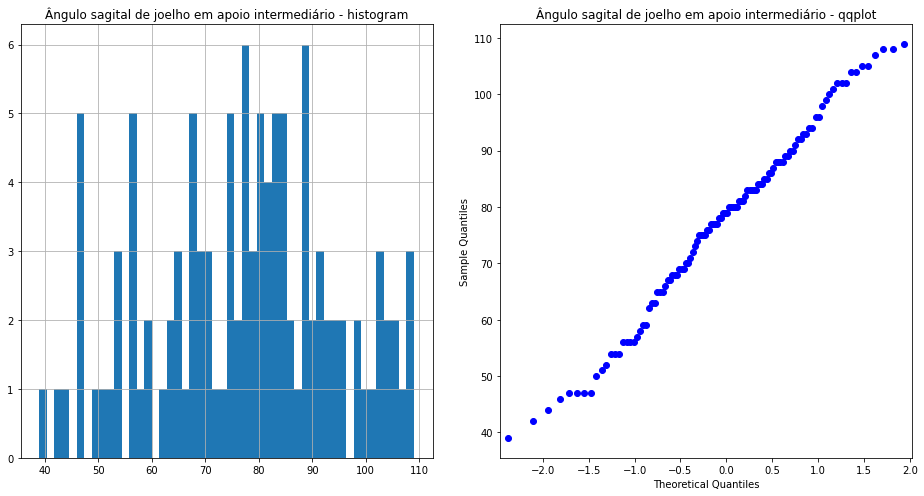

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo sagital de joelho em contato com a bola


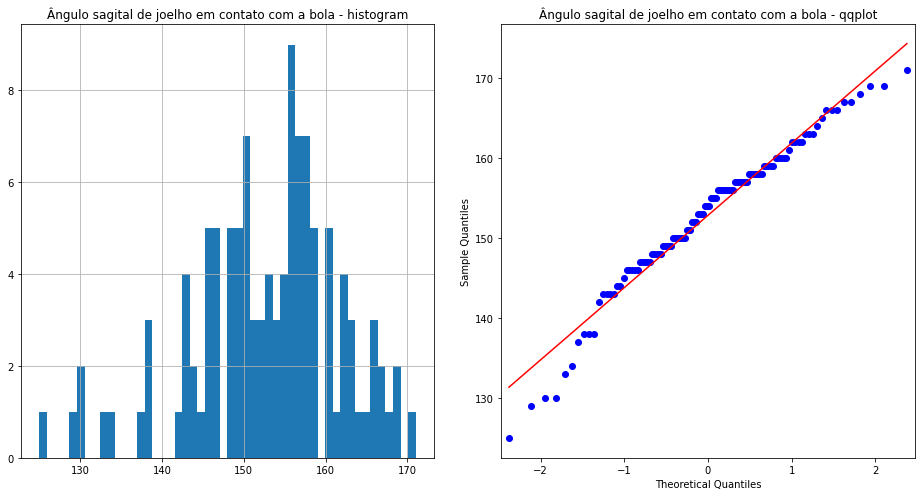

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo sagital de quadril em apoio intermediário


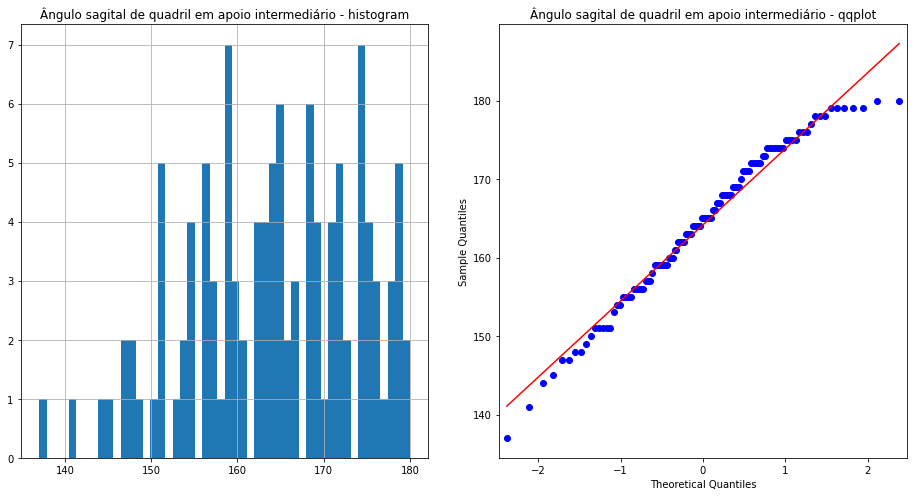

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo sagital de quadril em contato com a bola


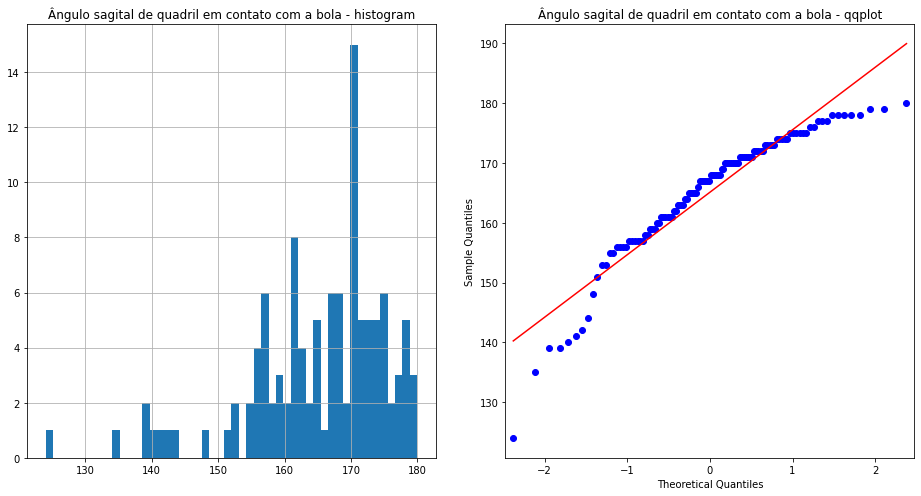

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo sagital de tornozelo em apoio intermediário


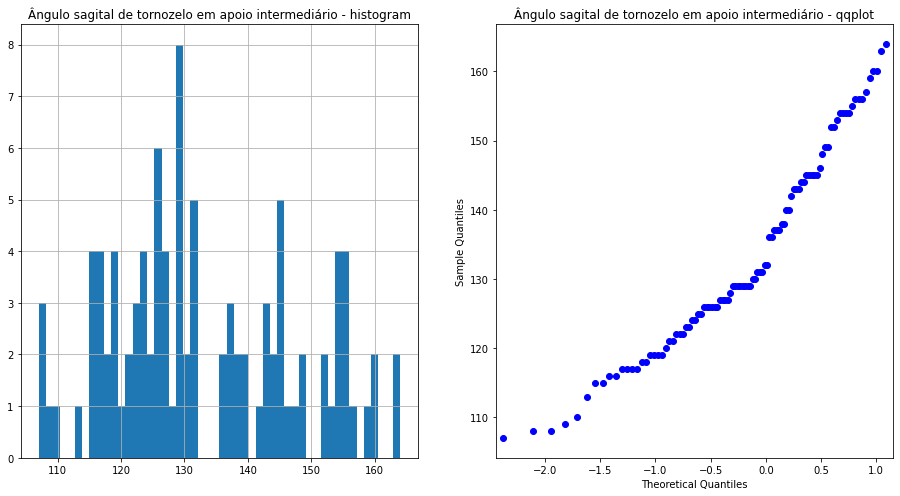

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo sagital de tornozelo em contato com a bola


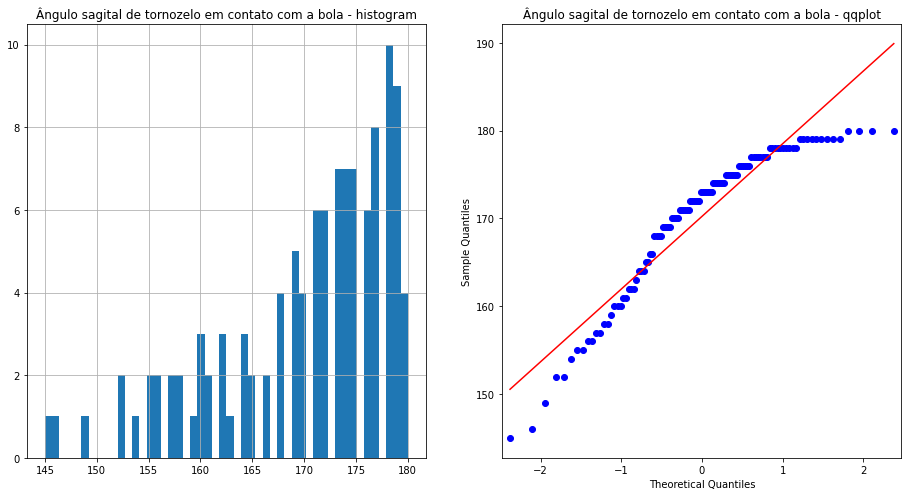

In [5]:
for col in c:
    f, ((ax1,ax2)) = plt.subplots(ncols=2, nrows=1)
    
    print(50*"= ")
    print(col)
    
    subdf = df[col].replace(".", np.nan).astype(float)
    
    subdf.hist(bins=50, ax=ax1)
    qqplot(subdf.values, line='s', ax=ax2)
    ax1.set_title(f"{col} - histogram")
    ax2.set_title(f"{col} - qqplot")
    plt.tight_layout()
    plt.savefig(f"{sheet}_{col}.png", dpi=150)
    plt.show()

# Reavaliação

In [6]:
sheet = "Reavaliação"

In [7]:
df = pd.read_excel('Dados IC Futebol Final.xlsx', encoding='latin-1', sheet_name=sheet).iloc[:114]

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo Frontal de inclinação pélvica em contato com a bola


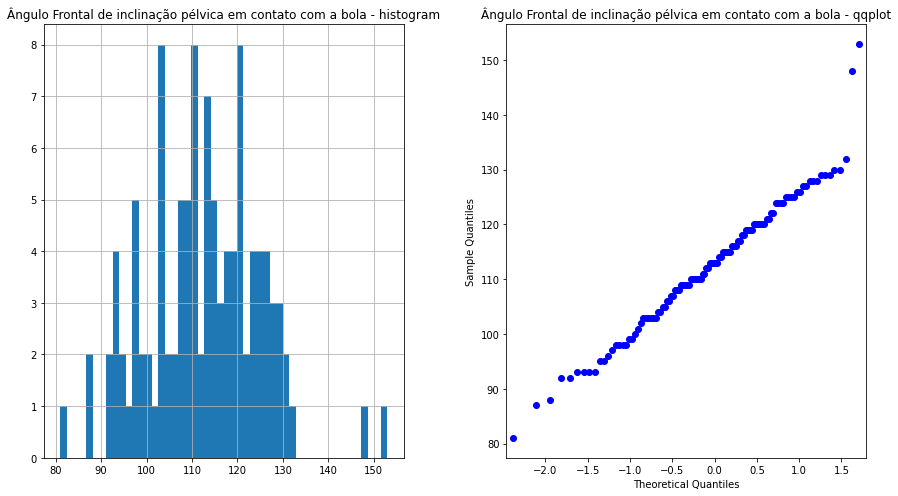

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo Frontal de inclinação pélvica no apoio intermediário


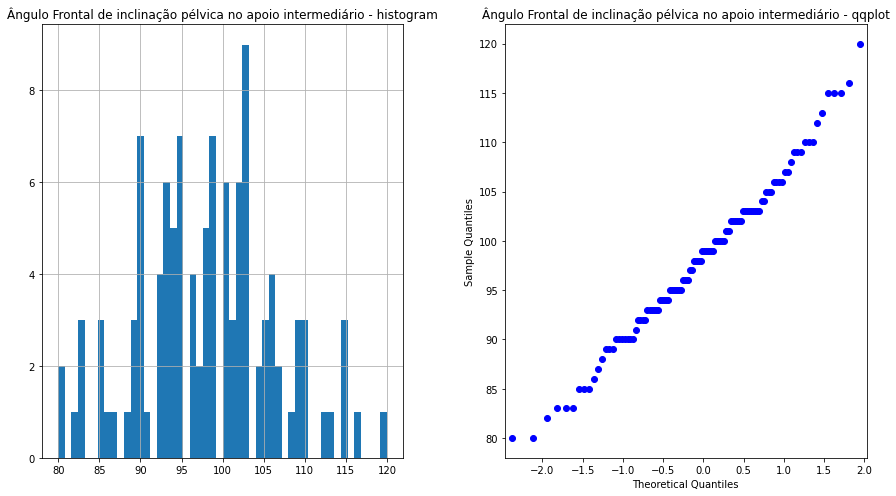

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo frontal de joelho em apoio intermediário


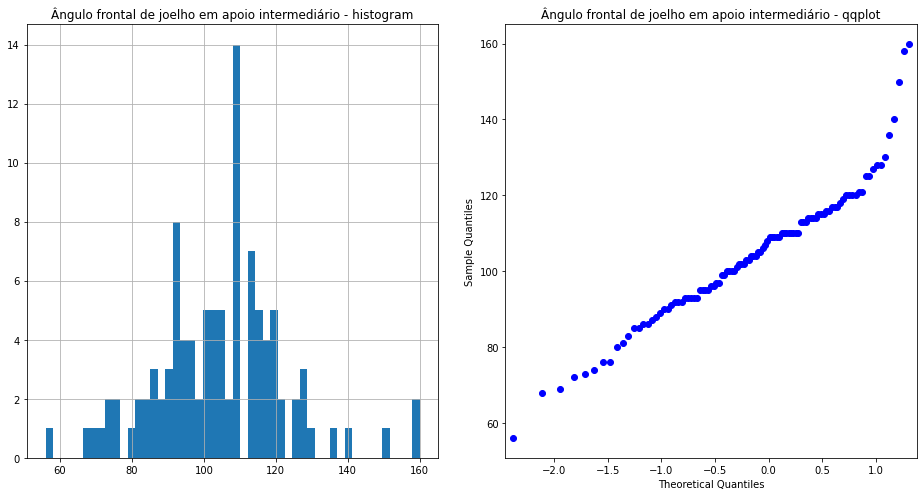

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo frontal de joelho em contato com a bola


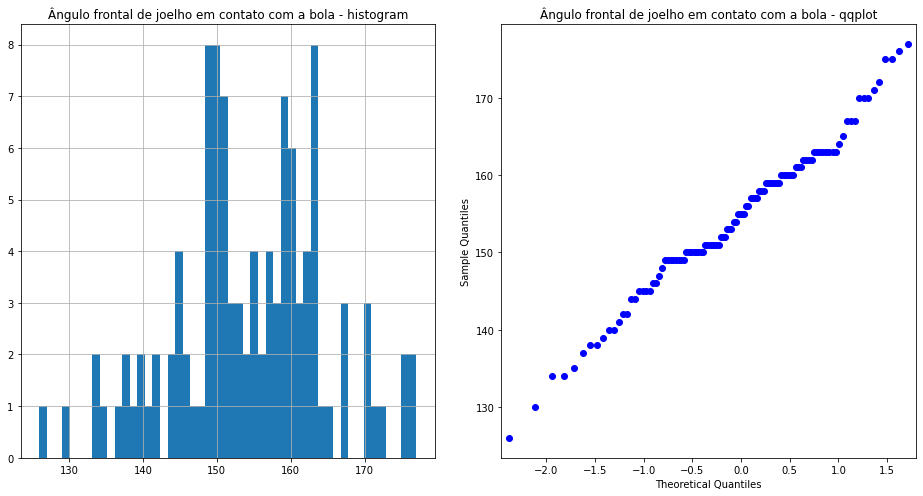

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo frontal de quadril em apoio intermediário


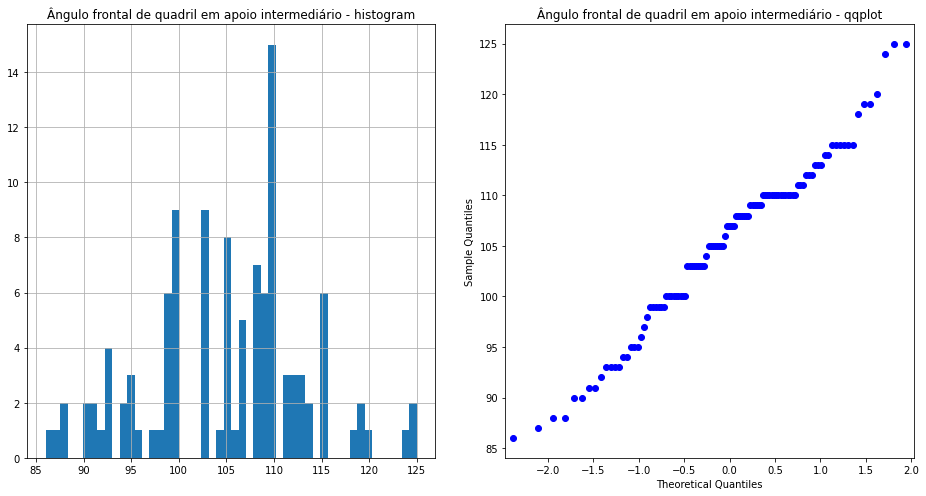

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo frontal de quadril em contato com a bola


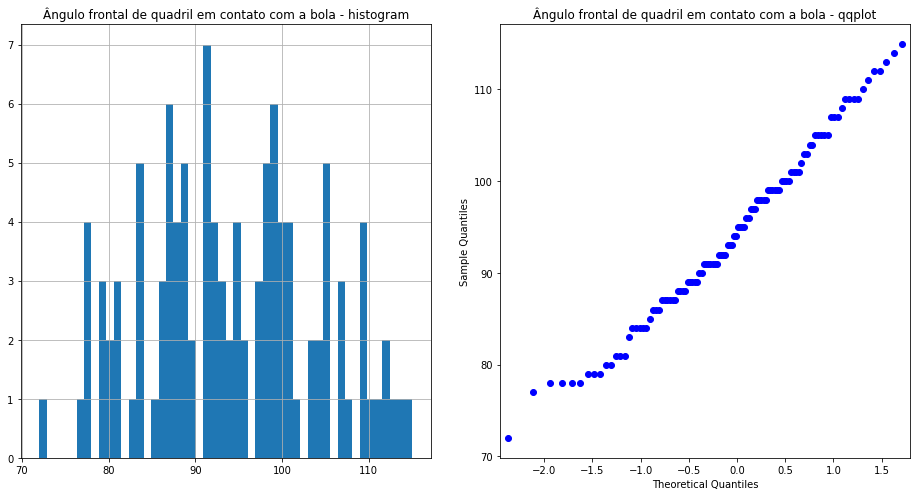

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo sagital de joelho em apoio intermediário


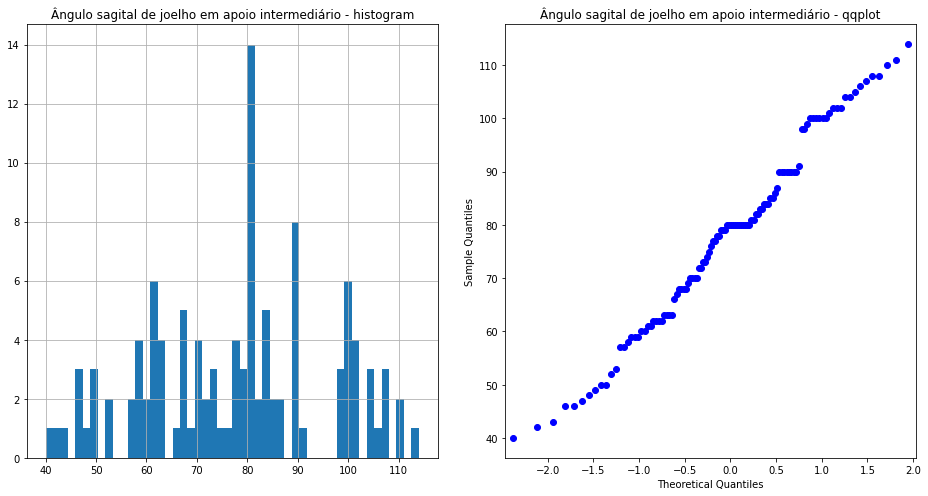

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo sagital de joelho em contato com a bola


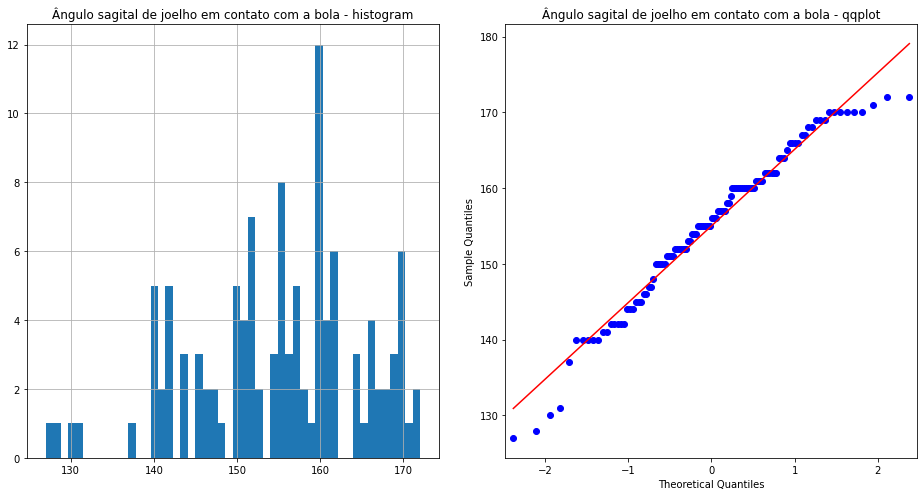

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo sagital de quadril em apoio intermediário


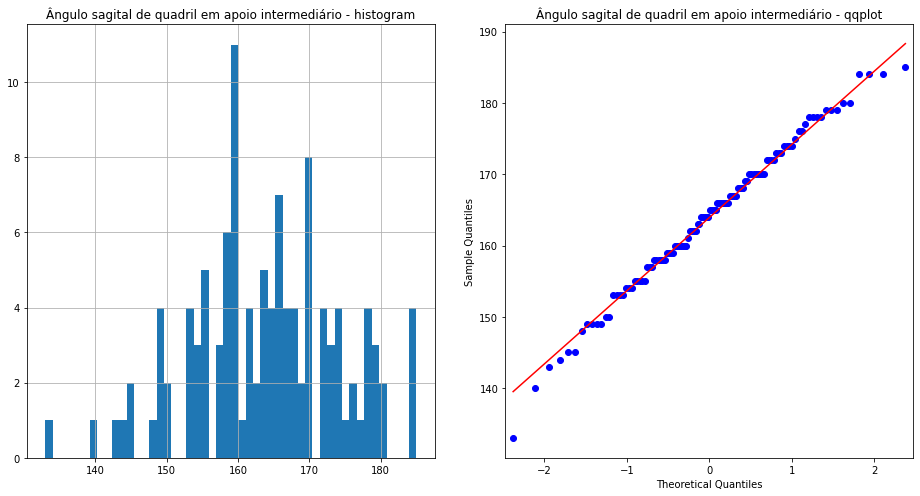

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo sagital de quadril em contato com a bola


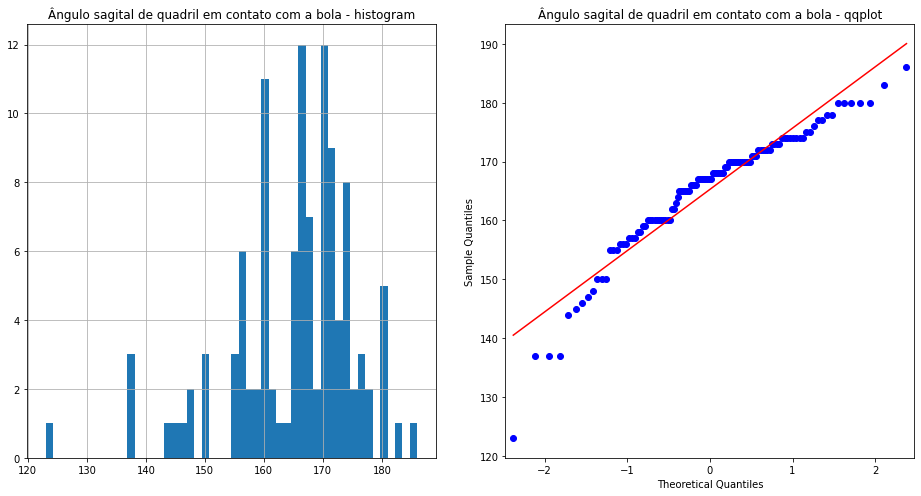

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo sagital de tornozelo em apoio intermediário


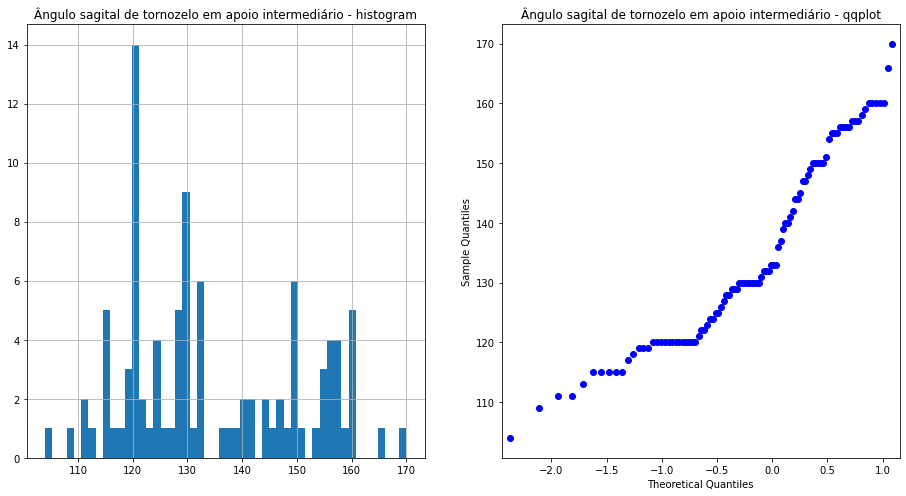

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo sagital de tornozelo em contato com a bola


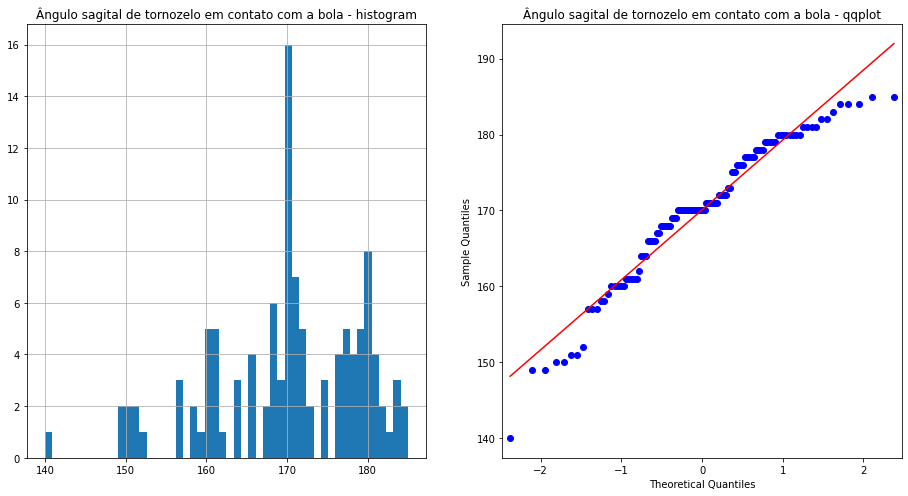

In [8]:
for col in c:
    f, ((ax1,ax2)) = plt.subplots(ncols=2, nrows=1)
    
    print(50*"= ")
    print(col)
    
    subdf = df[col].replace(".", np.nan).astype(float)
    
    subdf.hist(bins=50, ax=ax1)
    qqplot(subdf.values, line='s', ax=ax2)
    ax1.set_title(f"{col} - histogram")
    ax2.set_title(f"{col} - qqplot")
    plt.tight_layout()
    plt.savefig(f"{sheet}_{col}.png", dpi=150)
    plt.show()

# Avaliação Trocada

In [9]:
sheet = "Avaliação Trocada"

In [10]:
df = pd.read_excel('Dados IC Futebol Final.xlsx', encoding='latin-1', sheet_name=sheet).iloc[:114]

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo Frontal de inclinação pélvica em contato com a bola


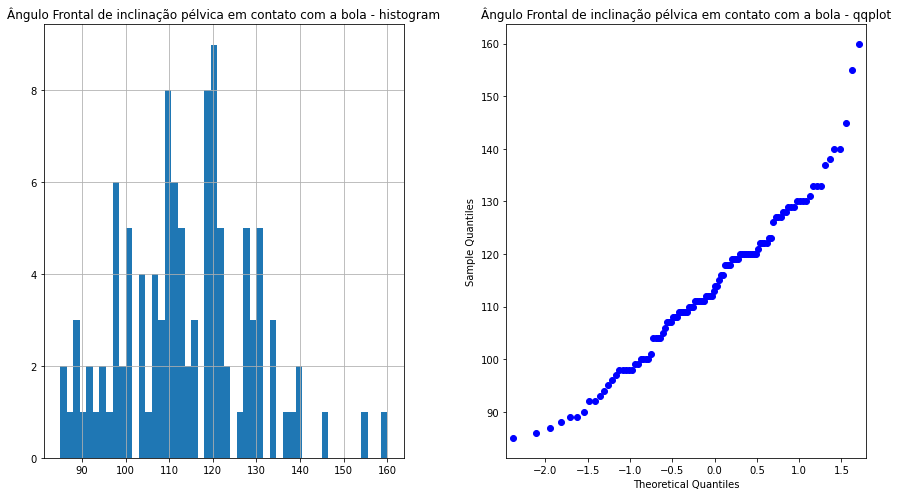

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo Frontal de inclinação pélvica no apoio intermediário


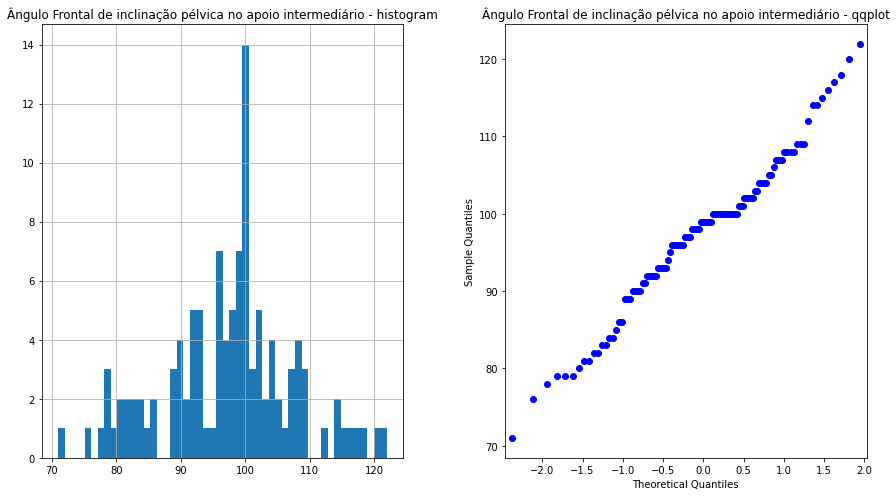

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo frontal de joelho em apoio intermediário


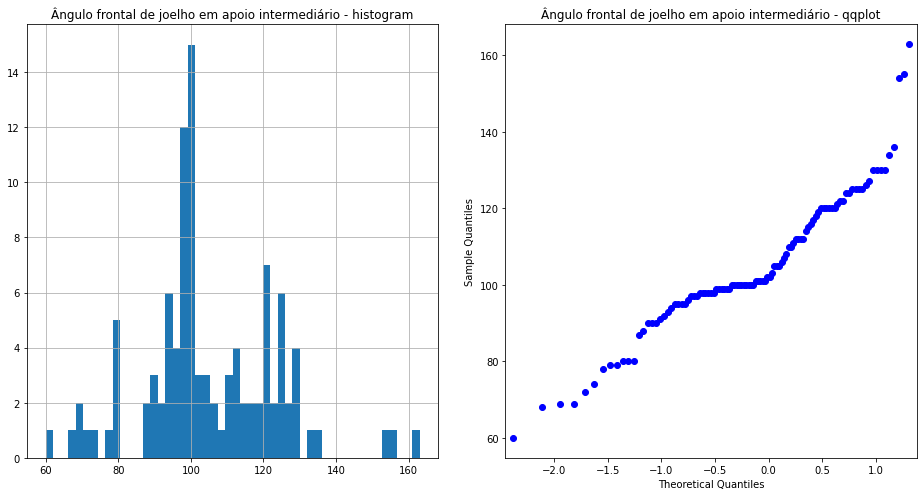

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo frontal de joelho em contato com a bola


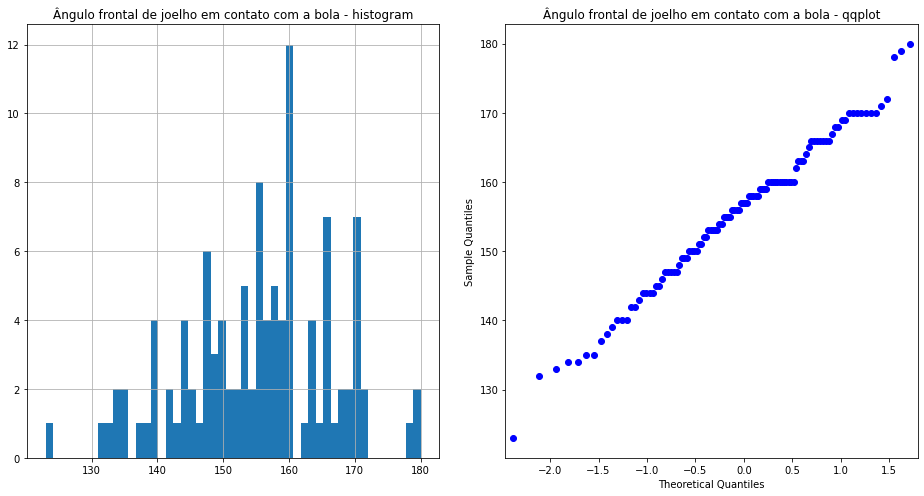

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo frontal de quadril em apoio intermediário


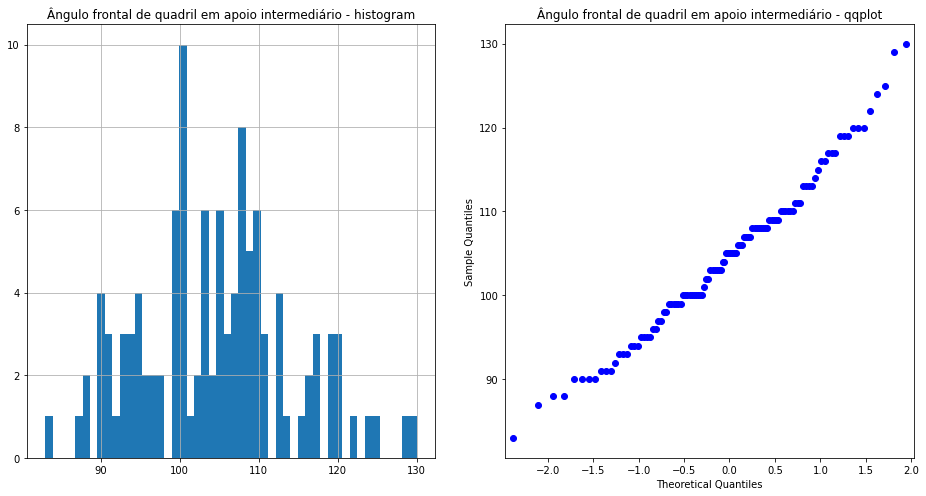

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo frontal de quadril em contato com a bola


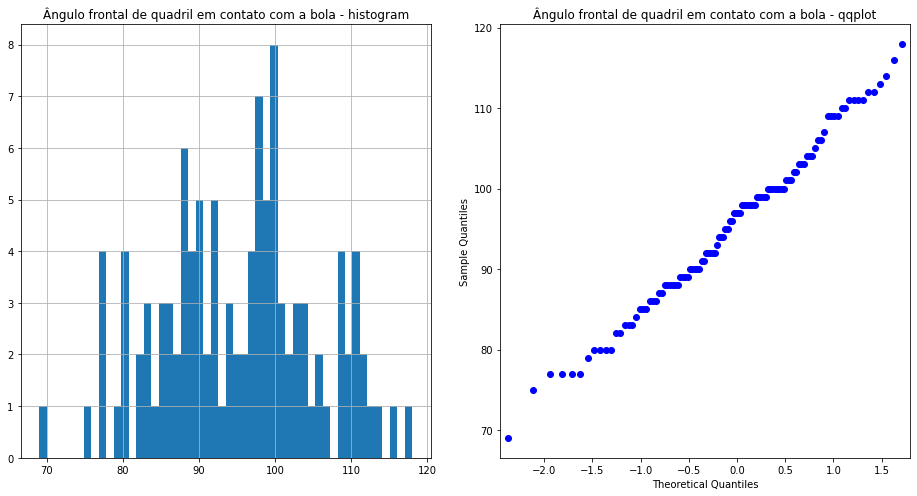

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo sagital de joelho em apoio intermediário


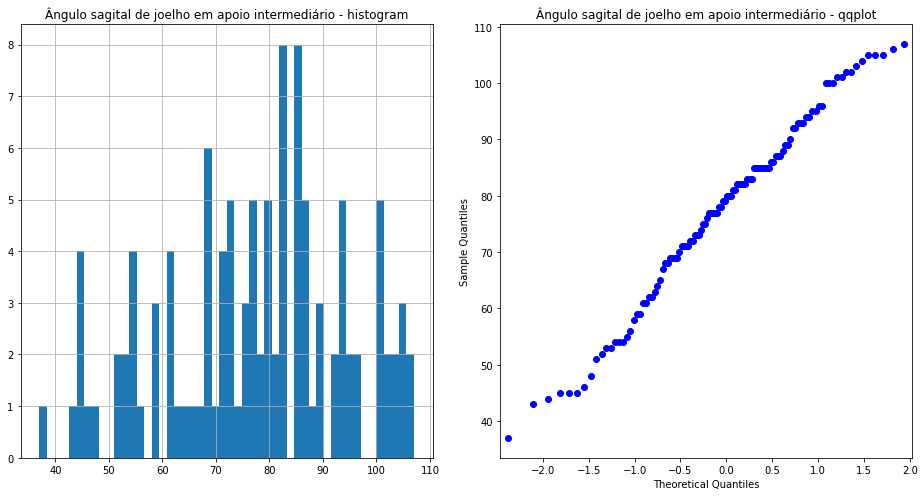

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo sagital de joelho em contato com a bola


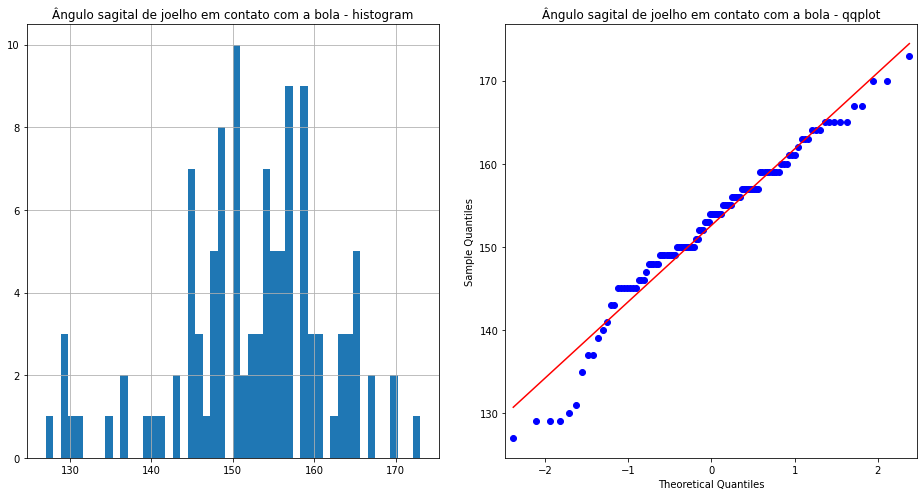

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo sagital de quadril em apoio intermediário


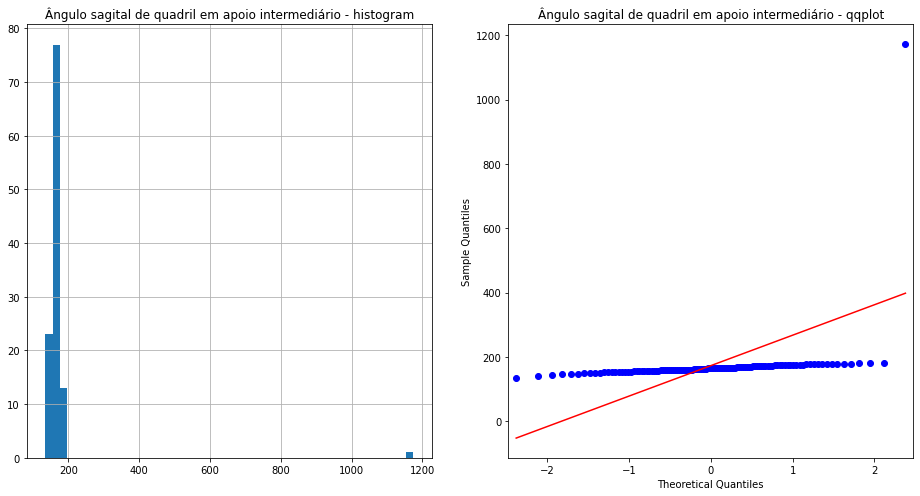

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo sagital de quadril em contato com a bola


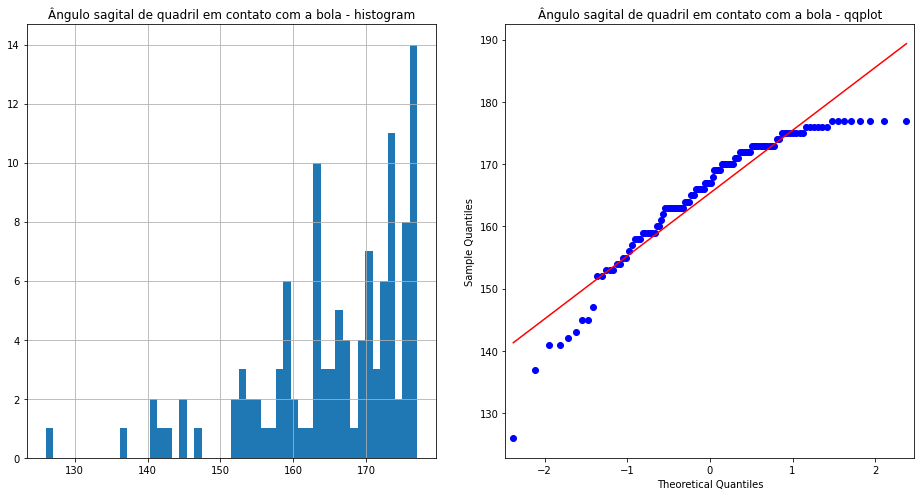

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo sagital de tornozelo em apoio intermediário


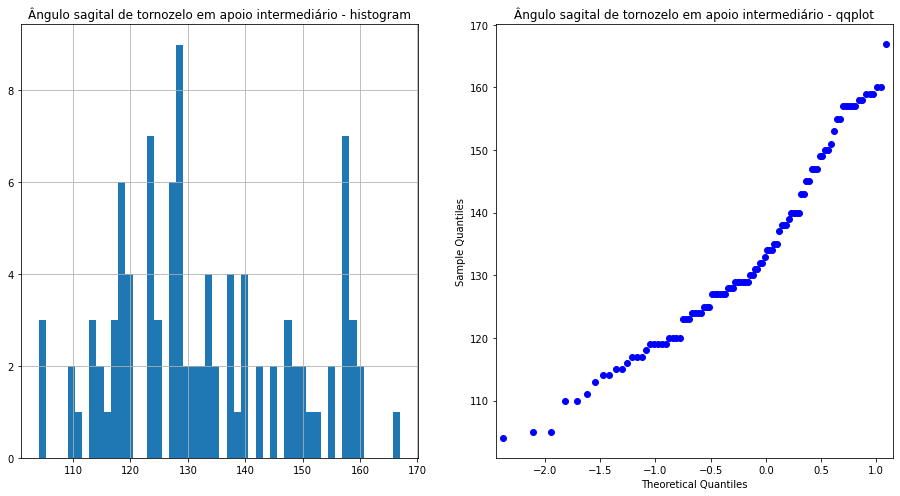

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Ângulo sagital de tornozelo em contato com a bola


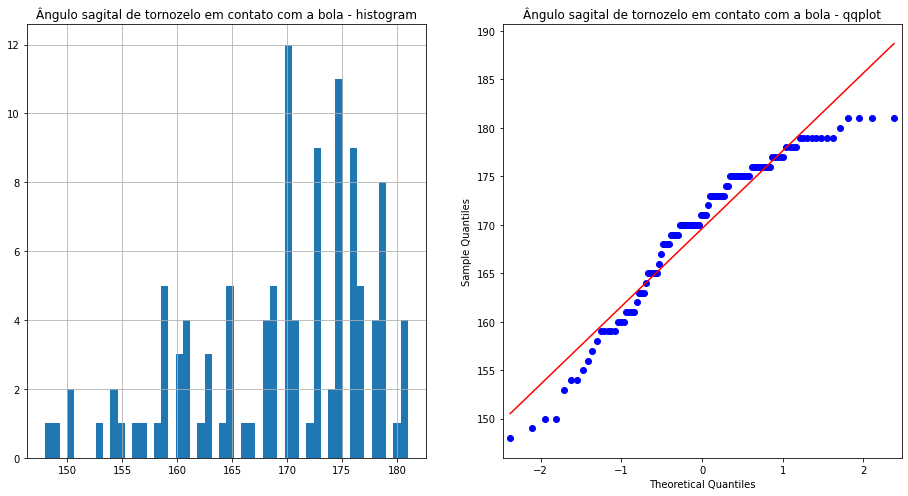

In [11]:
for col in c:
    f, ((ax1,ax2)) = plt.subplots(ncols=2, nrows=1)
    
    print(50*"= ")
    print(col)
    
    subdf = df[col].replace(".", np.nan).astype(float)
    
    subdf.hist(bins=50, ax=ax1)
    qqplot(subdf.values, line='s', ax=ax2)
    ax1.set_title(f"{col} - histogram")
    ax2.set_title(f"{col} - qqplot")
    plt.tight_layout()
    plt.savefig(f"{sheet}_{col}.png", dpi=150)
    plt.show()

.